# Monosynaptic pair analysis
-------

Example notebook demonstrating simple functions in SynapticConn for plotting spike trains. 

In [1]:
import os
import pathlib

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

os.chdir('../..')
print(os.getcwd())

from synapticonn.plots import plot_acg, plot_ccg
from synapticonn.postprocessing import compute_crosscorrelogram
from synapticonn.postprocessing import compute_autocorrelogram

import synapticonn as synapticonn

/Users/michael.zabolocki/Desktop/code/SynaptiConn


Load data. 

In [2]:
data_fpath = pathlib.Path('tests', 'BD0187_spikesorting_array.pkl')

# open pickle
all_units = np.load(data_fpath, allow_pickle=True)
all_units = all_units['spike_time_set']
# spike_train_1 = all_units[0]/30_000  # unit 0
# spike_train_2 = all_units[1]/30_000  # unit 1

Set parameters.

In [3]:
srate = 30_000
bin_size_ms = 0.5
max_lag_ms = 25

Initialize the object.

In [4]:
snc = synapticonn.SynaptiConn(all_units, bin_size_ms=1, max_lag_ms=100, srate=30_000, recording_length=600)

Check the loaded spike units.

In [5]:
spk_unit_report = snc.report_spike_units()
pd.DataFrame(spk_unit_report)

,unit_id,n_spikes
0,5,302
1,1,1152
2,0,918
3,16,524
4,17,315
5,18,195
6,15,192
7,4,299
8,3,277


## Auto-correlograms
---

Compute the autocorrelogram for select unit IDs.

Plotting autocorrelogram for spike units: [3 1]


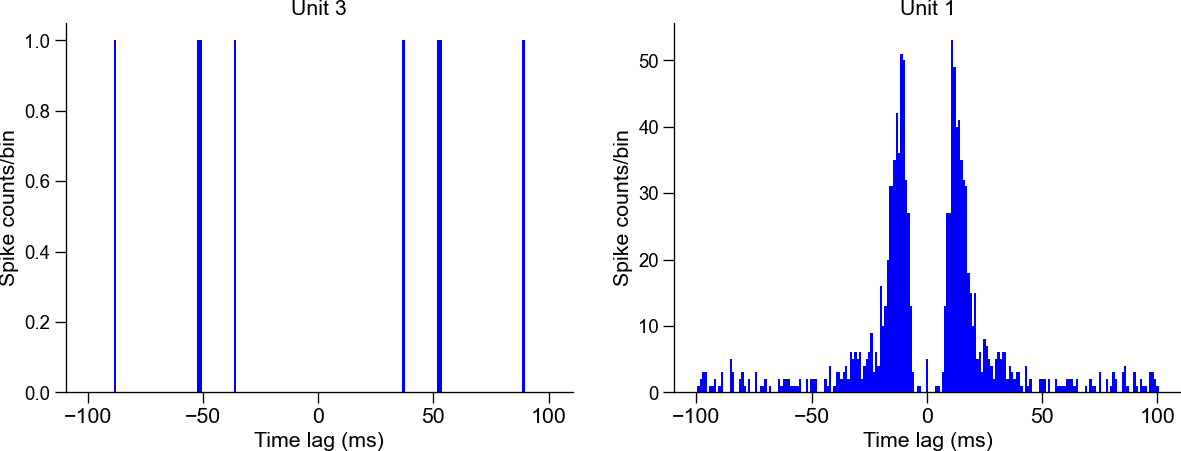

In [6]:
snc.plot_autocorrelogram(spike_units=[3,1,100], color='blue')

Set the bin parameters after initialization, and re-plot.

This can be used to change the binning on the plots, and max time lags.

Plotting autocorrelogram for spike units: [0 1]


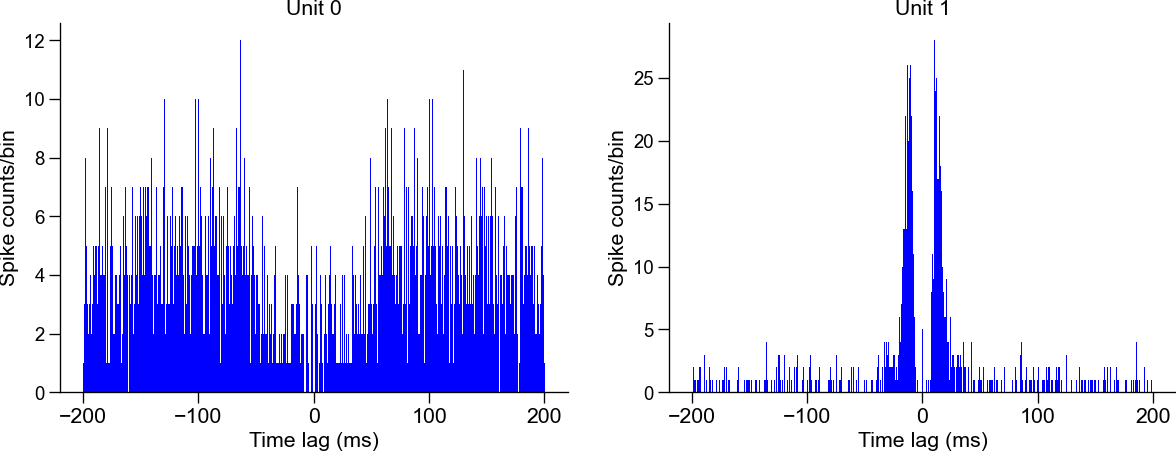

In [7]:
snc.set_bin_settings(bin_size_ms=0.5, max_lag_ms=200)
snc.plot_autocorrelogram(spike_units=[0,1], color='blue')

## Cross-correlograms
----

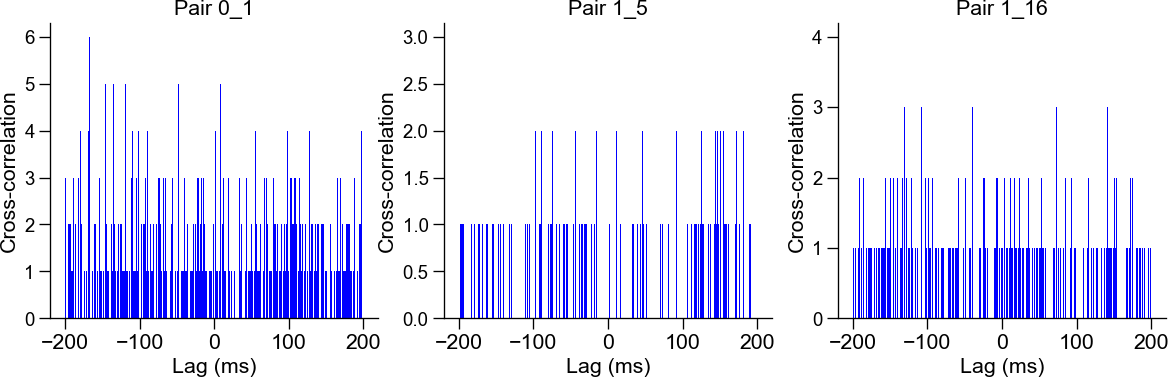

In [8]:
spike_pairs = [(1,16), (1,5), (0,1), (1,16)]
snc.plot_crosscorrelogram(spike_pairs=spike_pairs, figsize=(15, 4))

Alternatively, all possible pairs can be plotted.

In [9]:
# spike_labels = snc.get_spike_unit_labels()

# # get all possible pairs between labels as tuples (including self-pairs)
# spike_pairs = [(i, j) for i in spike_labels for j in spike_labels]
# snc.plot_crosscorrelogram(spike_pairs=spike_pairs, figsize=(20, 30))

## Return correlogram data
----

Next, return the correlogram data.

Each key in 'cross_correlations' is indexed by the unit pairs. The corresponding numbers refer to the spike counts, per bin.

Each key in 'bins' is also indexed by the unit pairs. The corresponding numbers refer to the bins edges.

In [10]:
correlogram_data = snc.return_crosscorrelogram_data(spike_pairs=spike_pairs)
correlogram_data

{'cross_correllations': {'0_1': array([0, 3, 2, 0, 0, 2, 0, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 0, 1, 1, 1,
         3, 0, 3, 0, 1, 1, 2, 0, 0, 2, 0, 0, 1, 1, 3, 4, 0, 1, 1, 4, 0, 4,
         2, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 2, 1, 2, 0, 0, 0, 1, 4, 0, 6,
         0, 1, 0, 1, 1, 0, 1, 1, 1, 2, 0, 0, 1, 2, 2, 2, 2, 0, 0, 2, 3, 1,
         2, 0, 3, 1, 3, 2, 1, 1, 0, 1, 0, 5, 0, 2, 1, 1, 1, 2, 0, 0, 5, 1,
         2, 2, 0, 2, 1, 1, 1, 1, 0, 0, 2, 2, 0, 2, 2, 3, 1, 1, 1, 1, 5, 1,
         2, 2, 2, 1, 2, 0, 0, 1, 1, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0,
         1, 5, 1, 1, 3, 1, 2, 2, 5, 1, 1, 2, 1, 1, 3, 0, 0, 0, 2, 1, 2, 0,
         0, 4, 3, 5, 2, 4, 0, 1, 2, 1, 1, 0, 0, 1, 2, 3, 2, 3, 1, 1, 0, 4,
         2, 0, 0, 3, 0, 2, 3, 2, 0, 0, 1, 3, 2, 0, 0, 2, 2, 3, 1, 0, 1, 0,
         2, 4, 0, 1, 0, 3, 0, 2, 0, 2, 1, 0, 1, 2, 1, 2, 2, 2, 1, 1, 0, 2,
         0, 2, 2, 2, 0, 1, 0, 1, 3, 2, 1, 3, 2, 1, 2, 3, 1, 0, 0, 0, 2, 1,
         3, 3, 1, 0, 1, 3, 3, 1, 1, 4, 0, 1, 1, 0, 1, 0, 0, 0, 1, 4, 1

Check the bin settings using for correlogram generations.

In [11]:
snc.report_correlogram_settings()

'Bin size: 0.5 ms, Max lag: 200 ms'

Simulate an excitatory-excitatory crosscorrelogram.

<BarContainer object of 100 artists>

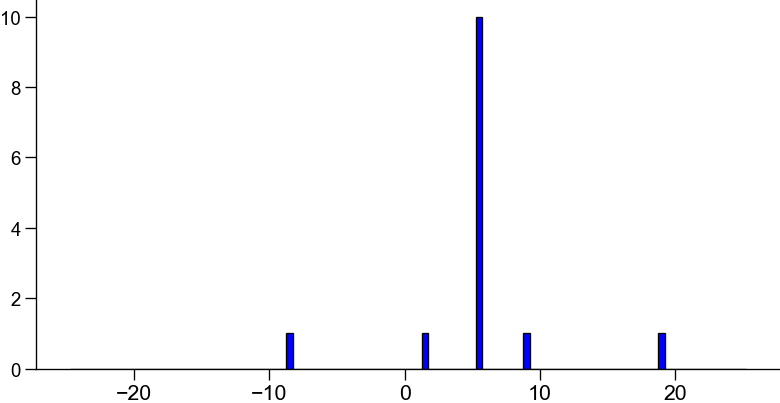

In [31]:
from synapticonn.postprocessing.crosscorrelograms import compute_crosscorrelogram_dual_spiketrains

neuron1_spike_train = [383.4, 423.7, 437.6, 544.9, 548.8, 602.8, 645.9, 715.2, 891.8, 963.7]
neuron2_spike_train = [388.4, 428.7, 442.6, 549.9, 553.8, 607.8, 650.9, 720.2, 896.8, 968.7]

bin_size_ms = 0.5
max_lag_ms = 25

# compute ccg
ccg, bins = compute_crosscorrelogram_dual_spiketrains(neuron1_spike_train, neuron2_spike_train, bin_size_ms, max_lag_ms)

# plot
plt.figure(figsize=(10, 5))
plt.bar(bins[1:], ccg, width=bin_size_ms, color='blue', edgecolor='black')
plt.show()

## Compute monosynaptic connections 
----

Compute excitatory and inhibitory monosynaptic connections between spike trains. 

This analysis was based on the following reference by Najafi et al., [here](https://www.sciencedirect.com/science/article/pii/S0896627319308487).

In [40]:
neuron1_spike_train

[383.4, 423.7, 437.6, 544.9, 548.8, 602.8, 645.9, 715.2, 891.8, 963.7]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


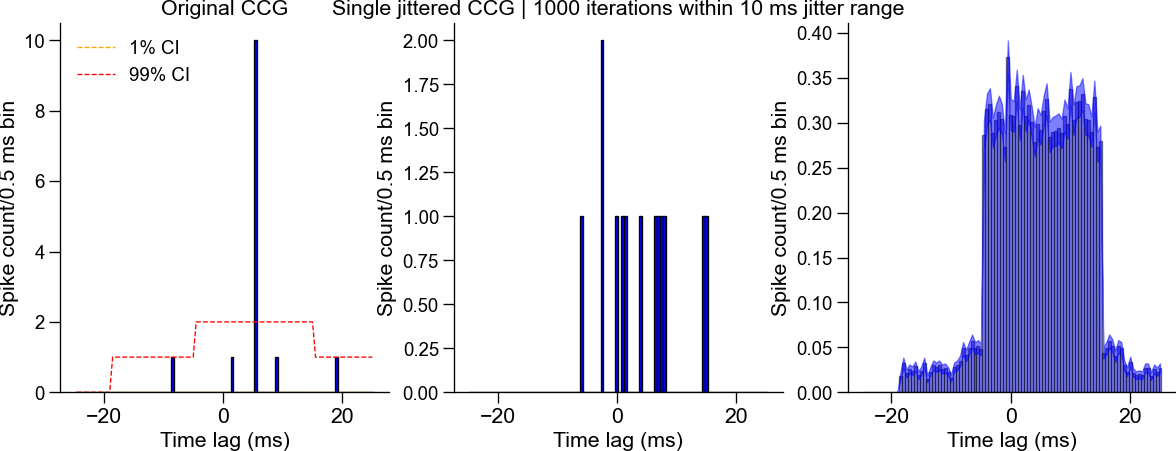

In [105]:
%load_ext autoreload
%autoreload 2

from synapticonn.analysis.synaptic_strength import calculate_jittered_ccg
ccg_bins, ccg_counts, jittered_ccgs = calculate_jittered_ccg(neuron1_spike_train, neuron2_spike_train, num_iterations=1000, max_lag_ms=25, bin_size_ms=0.5, jitter_range_ms=10)

# plot both the original and jittered ccgs
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].bar(ccg_bins[1:], ccg_counts, width=0.5, color='blue', edgecolor='black')
ax[0].set_title('Original CCG')
ax[1].bar(ccg_bins[1:], jittered_ccgs[20,:], width=0.5, color='blue', edgecolor='black')
ax[1].set_title('Single jittered CCG | 1000 iterations within 10 ms jitter range')

# plot mean and sem of jittered ccgs
ax[2].bar(ccg_bins[1:], np.mean(jittered_ccgs, axis=0), width=0.5, color='blue', edgecolor='black', alpha=0.5)
sem_vals = np.std(jittered_ccgs, axis=0) / np.sqrt(jittered_ccgs.shape[0])
ax[2].fill_between(ccg_bins[1:], np.mean(jittered_ccgs, axis=0) - sem_vals, np.mean(jittered_ccgs, axis=0) + sem_vals, color='blue', alpha=0.5)

# confidence intervals 
lower_conf = np.percentile(jittered_ccgs, 1, axis=0)
upper_conf = np.percentile(jittered_ccgs, 99, axis=0)

# plot the confidence intervals across original CCG, as calculated on the unjittered CCG
ax[0].plot(ccg_bins[1:], lower_conf, color='orange', linestyle='--', label='1% CI')
ax[0].plot(ccg_bins[1:], upper_conf, color='red', linestyle='--',label='99% CI')
ax[0].legend()

# axes
for a in ax:
    a.set_xlabel('Time lag (ms)')
    a.set_ylabel('Spike count/0.5 ms bin')

Can see here peaks above the 99% CI, which indicates statistical significance.

Next, compute the synaptic strength within a window.

In [117]:
bin_size_ms = 0.5
half_window_ms = 5  # window size in ms centered around zero lag

# identify the number of bins within the window, centered around zero lag
window_bins = int((half_window_ms*2) / (2 * bin_size_ms))
print(f'Window bins: {window_bins} | Window length: {half_window_ms*2} ms')

# slice the CCG bins within the window
mid_bin = len(ccg_bins) // 2  # the center bin corresponds to zero lag
window_slice = slice(mid_bin - window_bins, mid_bin + window_bins + 1)
print(f'Max time lag for centred window: {ccg_bins[window_slice][0]}')
print(f'Min time lag for centred window: {ccg_bins[window_slice][-1]}')

# identify the peak bin count within the window in the original CCG
x_real = np.max(ccg_counts[window_slice])

# compute mean and standard deviation of the jittered CCGs within the same window
jittered_window_counts = jittered_ccgs[:, window_slice]
m_jitter = np.mean(jittered_window_counts)
s_jitter = np.std(jittered_window_counts)

# calculate the synaptic stength as the Z-score
if s_jitter > 0:
    synaptic_strength = (x_real - m_jitter) / s_jitter
else:
    synaptic_strength = np.inf  # if no variance in jittered counts, Z is undefined or infinite
    
print(f'Synaptic strength: {synaptic_strength}')

Window bins: 10 | Window length: 10 ms
Max time lag for centred window: -5.0
Min time lag for centred window: 5.0
Synaptic strength: 17.75677378008046


In [114]:
window_slice

slice(40, 61, None)

In [111]:
window_slice[0]

TypeError: 'slice' object is not subscriptable

In [59]:
jittered_ccgs

array([[-25. , -24.5, -24. , ...,  24. ,  24.5,  25. ],
       [-25. , -24.5, -24. , ...,  24. ,  24.5,  25. ],
       [-25. , -24.5, -24. , ...,  24. ,  24.5,  25. ],
       ...,
       [-25. , -24.5, -24. , ...,  24. ,  24.5,  25. ],
       [-25. , -24.5, -24. , ...,  24. ,  24.5,  25. ],
       [-25. , -24.5, -24. , ...,  24. ,  24.5,  25. ]])

In [56]:
jittered_ccgs.shape

(1000, 101)

In [51]:
ccg_counts.shape, jittered_ccgs.shape

((100,), (1000, 101))

Apply a jitter.

In [14]:
# Check how the stats are created here

# Check all the plots / utils functions for this analysis

# Check the jittered CCG outputs; why is it returning something else?
# In this analysis, the jitter serves as a way to simulate a random or chance distribution of spike coincidences between the two cells.
# By adding small, random shifts (jitter) to the spike times of the post-cell,
# we can generate many different randomized versions of the spike train. Here's how this affects the analysis.

## TO DO:
-----

- Plot all the data out

- Make an option to add new data -- therefore clearing the previous data here

- Check this analysis with a DANDI dataset

- Make a simulation model for ccgs and times etc. etc. to test these parameters

- Return ACG data

- Test units

- Style is not being fitted globally --> the decorator is useless?

- Document all the steps in place to check this all out ...

- Option to improve the labels here for the units? Check it with different input types

- Build a core object which allows for batch-processing, but also adds in the srates etc. of the recordings

- Option to cross-check with the distances???

- Option to change individual colors for CCGs?

- Merge the CCG and ACG decorators into one?

- For autocorrelograms:
    - ensure that the input is a list type 
    - add a function to check the lags and the bins for this etc.
    - check whether unit ids can be in str format etc.

- Plot_ccg is computing and then plotssing --> should be separate?

- Analysis for CCG and ACG should be separated?

- Check the CCG binning --> test this!

- Check the type hinting / remove these?